# 4-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### (1) 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

<AxesSubplot:>

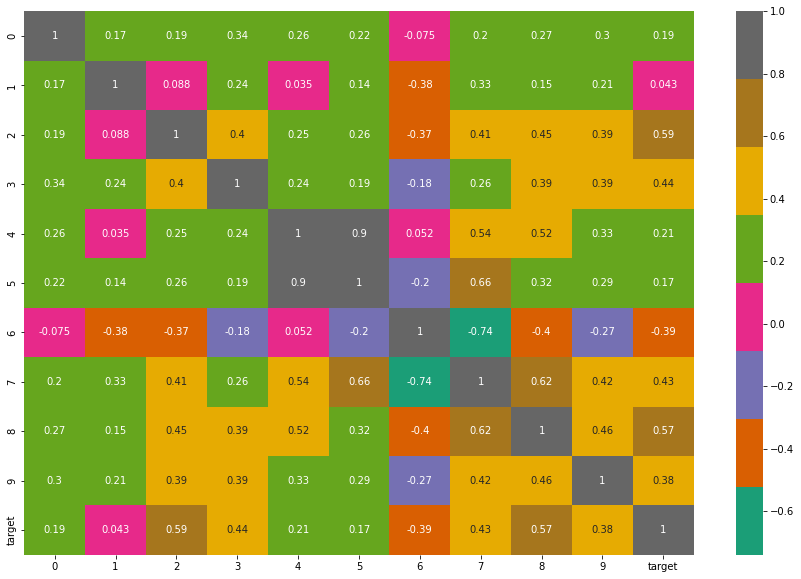

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_X = pd.DataFrame(df_X)
df_X['target'] = df_y

corr = df_X.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap = 'Dark2')

0.5이상의 값이 아닌 것들을 다 빼고 실행해보기로 했다.

In [4]:
df_X = df_X.drop([0, 1, 3, 4, 5, 6, 7, 9, 'target'], axis =1)

### (2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.


In [5]:
import numpy as np

df_X = np.array(df_X)

### (3) 모델에 예측할 데이터 y 준비하기


- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.


In [6]:
df_y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기


- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.2, 
                                                    random_state=2022)

### (5) 모델 준비하기


- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.


##### 입력 데이터 개수 찾기

In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

feature는 10개가 있다. 그 중에서 뺀 컬럼 수를 고려하면 W는 2

In [9]:
W = np.random.rand(2)
b = np.random.rand()

In [10]:
def model(X, W, b):
    predictions = 0
    for i in range(2):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.

In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [12]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기


- 기울기를 계산하는 gradient 함수를 구현해주세요.


In [13]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    return dW, db

### (8) 하이퍼 파라미터인 학습률 설정하기


- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [14]:
LEARNING_RATE = 0.55

learning rate는 0.001부터 0.55가 되기까지 성능이 더 좋아졌으며, 1이 되는 순간 학습을 반복할수록 값이 더 늘어났다.

어떤 컬럼도 제거하지 않은 경우도 실행해봤는데 0.001부터 0.9가 되기까지 성능이 더 좋아졌으며, 1이 되는 순간 마찬가지로 값이 더 늘어났다.

### (9) 모델 학습하기


- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [15]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5739.2682
Iteration 20 : Loss 5576.3312
Iteration 30 : Loss 5424.1950
Iteration 40 : Loss 5282.1438
Iteration 50 : Loss 5149.5090
Iteration 60 : Loss 5025.6664
Iteration 70 : Loss 4910.0331
Iteration 80 : Loss 4802.0650
Iteration 90 : Loss 4701.2540
Iteration 100 : Loss 4607.1256
Iteration 110 : Loss 4519.2368
Iteration 120 : Loss 4437.1740
Iteration 130 : Loss 4360.5511
Iteration 140 : Loss 4289.0073
Iteration 150 : Loss 4222.2061
Iteration 160 : Loss 4159.8330
Iteration 170 : Loss 4101.5945
Iteration 180 : Loss 4047.2165
Iteration 190 : Loss 3996.4431
Iteration 200 : Loss 3949.0354
Iteration 210 : Loss 3904.7703
Iteration 220 : Loss 3863.4394
Iteration 230 : Loss 3824.8482
Iteration 240 : Loss 3788.8152
Iteration 250 : Loss 3755.1707
Iteration 260 : Loss 3723.7564
Iteration 270 : Loss 3694.4245
Iteration 280 : Loss 3667.0369
Iteration 290 : Loss 3641.4647
Iteration 300 : Loss 3617.5877
Iteration 310 : Loss 3595.2934
Iteration 320 : Loss 3574.4769
Iteration 330 : L

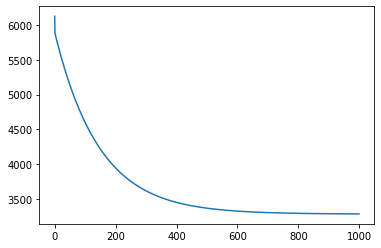

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

### (10) test 데이터에 대한 성능 확인하기


- test 데이터에 대한 성능을 확인해주세요.


In [17]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2901.6337092764766

- ##### MSE 손실함수값 3000 이하를 달성

### (11) 정답 데이터와 예측한 데이터 시각화하기


- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.



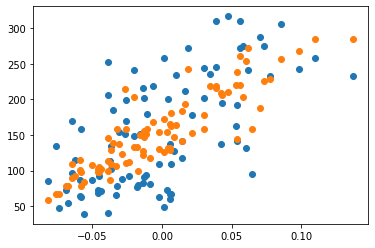

In [18]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

----------------------

# 4-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### (1) 데이터 가져오기

- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [19]:
import pandas as pd
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [20]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [21]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

In [22]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


출처: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

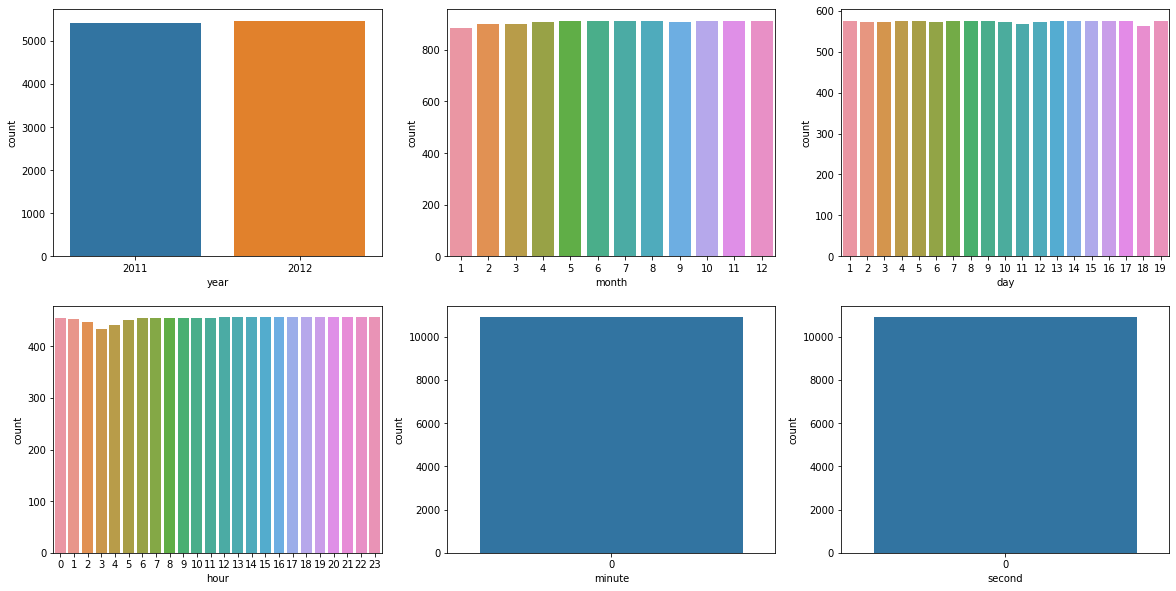

In [23]:
import seaborn as sns

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.countplot(x="year", data=train)

plt.subplot(2, 3, 2)
sns.countplot(x="month", data=train)

plt.subplot(2, 3, 3)
sns.countplot(x="day", data=train)

plt.subplot(2, 3, 4)
sns.countplot(x="hour", data=train)

plt.subplot(2, 3, 5)
sns.countplot(x="minute", data=train)

plt.subplot(2, 3, 6)
sns.countplot(x="second", data=train)

plt.show()

출처: https://www.w3schools.com/python/matplotlib_subplot.asp

### (4) X, y 컬럼 선택 및 train/test 데이터 분리


- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기



In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [25]:
train = train.drop(['datetime'], axis = 1)

In [26]:
temp = train['count']
train = train.drop(['count'], axis = 1)
train['count'] = temp

<AxesSubplot:>

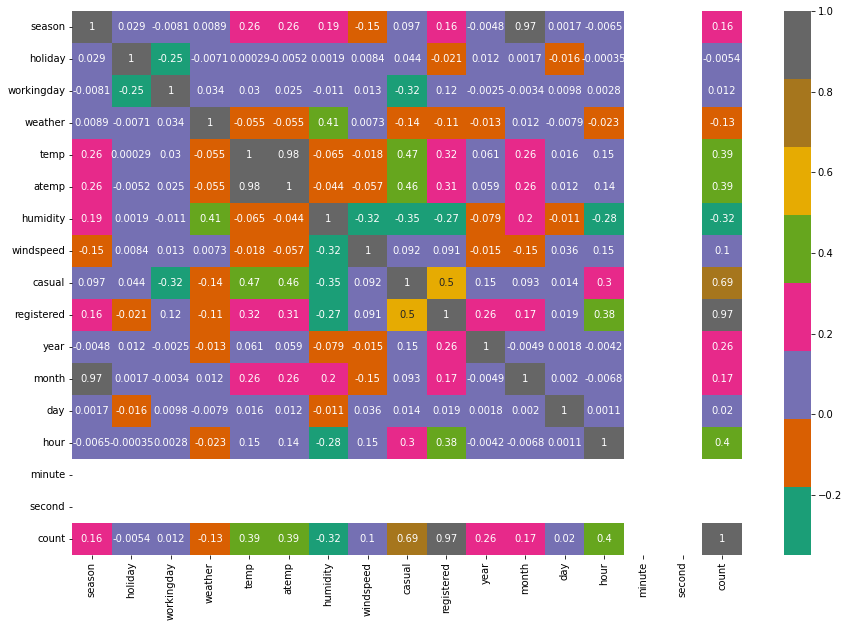

In [27]:
corr = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap = 'Dark2')

- count를 예측하는데 casual, registered 컬럼이 필요할까요?

: casual은 등록하지 않고 자전거를 빌린 사람이고, registered는 등록하고 자전거를 빌린 사람이기 때문에 count를 구할 때 casual과 registered 피처가 남아있다면 오차가 말도 안되게 적게 나올 수 있다.

In [28]:
train = train.drop(['casual', 'registered'], axis = 1)

0.1보다 작은 값들은 제거해주기로 했다.

In [29]:
train = train.drop(['holiday', 'workingday', 'day', 'minute', 'second'], axis = 1)

In [30]:
df_X0 = train.drop(['count'], axis = 1)
df_y0 = train['count']

In [31]:
df_X0 = np.array(df_X0)
df_y0 = np.array(df_y0)

In [32]:
X0_train, X0_test, y0_train, y0_test = train_test_split(df_X0, 
                                                    df_y0, 
                                                    test_size=0.2, 
                                                    random_state=2022)

### 아래는 프로젝트1처럼 손실함수를 구해보려 실험해 본 것입니다. 이 내용 뒤에는 사이킷런으로 MSE와 RMSE를 구했습니다.
--------------------------------------------

In [33]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
cols = [
        'season',
        'weather',
        'temp',
        'atemp',
        'humidity',
        'windspeed', 
        'year',
        'month',
        'hour',
        'count'
        ]

train[cols] = norm.fit_transform(train[cols])

In [34]:
df_X = train.drop(['count'], axis = 1)
df_y = train['count']

In [35]:
# df_X = np.array(df_X)
# df_y = np.array(df_y)
df_X = df_X.values
df_y = df_y.values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.2, 
                                                    random_state=2022)

In [37]:
W = np.random.rand(9)
b = np.random.rand()

In [38]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
#     print('rmse = ', rmse)
    return rmse

In [39]:
def model(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
#     print('predictions = ', predictions)
    return predictions

In [40]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L =  RMSE(predictions, y)
#     print('L = ', L)
    return L

In [41]:
def gradient(X, W, b, y):
    N = len(y)
#     print('N = ', N)
    y_pred = model(X, W, b)
#     print('y_pred = ',y_pred)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [42]:
LEARNING_RATE = 0.005

In [43]:
losses = []

for i in range(1, 4000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 0.1520
Iteration 200 : Loss 0.0924
Iteration 300 : Loss 0.0909
Iteration 400 : Loss 0.0909
Iteration 500 : Loss 0.0909
Iteration 600 : Loss 0.0909
Iteration 700 : Loss 0.0909
Iteration 800 : Loss 0.0908
Iteration 900 : Loss 0.0908
Iteration 1000 : Loss 0.0908
Iteration 1100 : Loss 0.0908
Iteration 1200 : Loss 0.0908
Iteration 1300 : Loss 0.0908
Iteration 1400 : Loss 0.0908
Iteration 1500 : Loss 0.0908
Iteration 1600 : Loss 0.0908
Iteration 1700 : Loss 0.0908
Iteration 1800 : Loss 0.0908
Iteration 1900 : Loss 0.0907
Iteration 2000 : Loss 0.0907
Iteration 2100 : Loss 0.0907
Iteration 2200 : Loss 0.0907
Iteration 2300 : Loss 0.0907
Iteration 2400 : Loss 0.0907
Iteration 2500 : Loss 0.0907
Iteration 2600 : Loss 0.0907
Iteration 2700 : Loss 0.0907
Iteration 2800 : Loss 0.0907
Iteration 2900 : Loss 0.0907
Iteration 3000 : Loss 0.0906
Iteration 3100 : Loss 0.0906
Iteration 3200 : Loss 0.0906
Iteration 3300 : Loss 0.0906
Iteration 3400 : Loss 0.0906
Iteration 3500 : Loss 0

어디에서 문제가 있는지 알아보려고 print함수를 사용해서 확인해봤다.

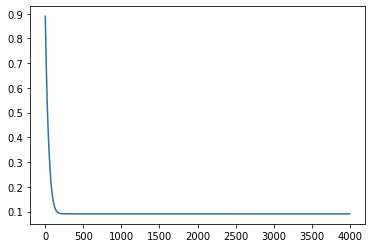

In [44]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

### 발산하지 않도록 시도한 것

1. 다른 스케일러 사용해보기 2. 러닝레이트 조정해보기 3. 반복 횟수 늘려보기

러닝 레이트가 크면 다른 스케일러를 사용해도 발산해버린다.

In [45]:
prediction = model(X_test, W, b)
rmse = loss(X_test, W, b, y_test)
rmse

0.08905357568048192

--------------

### (5) LinearRegression 모델 학습


- sklearn의 LinearRegression 모델 불러오기 및 학습하기


In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X0_train, y0_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산


- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기(RMSE 값 150 이하를 달성)

In [47]:
y0_pred = model.predict(X0_test)
y0_pred

array([355.93654483, 209.14792836, 180.66357643, ..., 228.5279842 ,
       292.0102067 ,  -1.16678638])

### 손실함수를 직접 계산해봤습니다.

--------------

In [48]:
y0_test = pd.DataFrame(y0_test)

y0_test['predictions'] = y0_pred
y0_test['error'] = y0_test[0] - y0_pred
y0_test

,0,predictions,error
0,332,355.936545,-23.936545
1,80,209.147928,-129.147928
2,372,180.663576,191.336424
3,176,154.610569,21.389431
4,224,280.891196,-56.891196
...,...,...,...
2173,1,-2.433303,3.433303
2174,304,205.729694,98.270306
2175,29,228.527984,-199.527984
2176,538,292.010207,245.989793


In [49]:
y0_test['squared_error'] = y0_test['error']**2
mse = y0_test['squared_error'].mean()
rmse = np.sqrt(mse)
rmse

141.74824631888853

In [50]:
y0_test = y0_test.drop(['predictions', 'error','squared_error'], axis = 1)

In [51]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y0_test, y0_pred)
mse

20092.5653344803

In [52]:
rmse = mean_squared_error(y0_test, y0_pred, squared=False)
rmse

141.74824631888853

출처: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

##### RMSE 값 150 이하를 달성

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기


- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

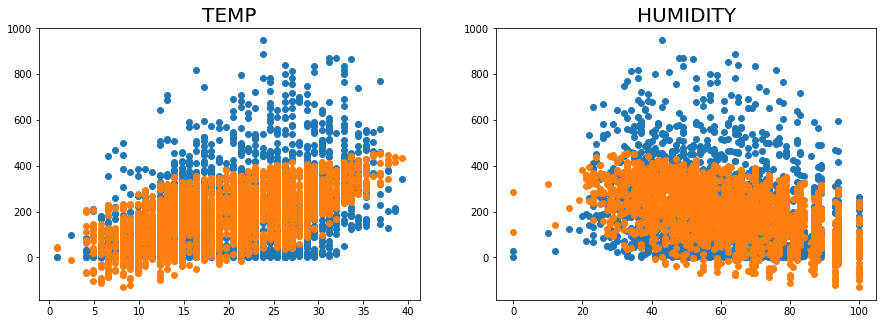

In [53]:
X0_test = pd.DataFrame(X0_test)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X0_test[2], y0_test)
plt.scatter(X0_test[2], y0_pred)
plt.title('TEMP', fontsize = '20')

plt.subplot(1, 2, 2)
plt.scatter(X0_test[4], y0_test)
plt.scatter(X0_test[4], y0_pred)
plt.title('HUMIDITY', fontsize = '20')
plt.show()

----------------------

# 회고

#### 어려웠던 점
*모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기* : 이 말이 무슨 뜻인지 이해하기 어려웠다.


#### 해결을 위해 시도한 방법
그래서 노드에 나왔던 내용을 확인했고, 나와있던 내용을 모두 다 적용해봤다.


#### 문제 해결에 성공한 이유
처음에 overflow Runtimeerror가 나왔는데, 수경님이 minmaxscaler로 값을 조정해보라고 하셔서 에러는 나지 않게 되었다. 하지만 계속 발산했고... normalizer로 정규화를 해봤는데도 발산했고, 그래프가 수렴할 수 있도록 learning rate를 조정했다. learning rate가 작아지자 수렴하긴 했으나 곡선의 기울기가 너무 완만해서 반복 횟수를 늘렸더니 급격히 감소하는 것을 확인할 수 있었다.

#### 알아낸 점
당뇨병 문제에서는 이미 정규화가 되어있어서 오버플로우가 일어나지 않았던 것이다.

#### 루브릭 평가 지표를 맞추기 위해 시도한 내용
시각화를 다양화하기 위해 히트맵도 사용해봤다.

#### 느낀점
- 프로젝트 1을 하면서 DESCR를 읽지 않아 성별까지 정규화되어있는 수치를 보고 당황했었다. 다음부터는 DESCR를 대충이라도 읽어줘야겠다.


- 항상 언젠가 이해 될 거라는 생각으로 노드의 흐름만 따라가다보니 당뇨병 수치를 어떻게 알아봐야 하는 지 잊어버려서 당뇨병 진단 기준을 구글링했었다. 당연히 target에 담겨 있다는 걸 잊어버렸었다. 이번에 이해가 되었으니 다음에는 당황하지 않을 것 같다.


- 슬라이싱 방식을 잊어버려서 마지막에 시각화해보라는 문제의 이해가 어려웠다. 슬라이싱은 배열인지, 시리즈인지, 데이터프레임인지에 따라 방식이 다르다. 데이터프레임 슬라이싱에는 iloc과 loc을 이용해보자.


- 어떤 컬럼을 drop했는지 기억해두고 슬라이싱할 때도 고려해줘야 한다.


- subplot으로 6개의 그래프를 한 번에 표현하는 방식을 복습했고, 크기를 키우는 법도 복습했다.


- 프로젝트 2에서 *만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.* 라는 문구에 '그럼 좋은 거 아닌가?'라고 생각했었는데, 상세 정보를 보고 오니 무슨 말인지 이해가 되었다. 상세 정보를 읽는 습관이 필요하다.


- y_test의 error값에서 e가 나와서 소수점 표현을 e가 나오지 않게 하는 방식을 배웠다.


- 그럼에도 불구하고 에러가 0이 나왔기 때문에 train_test_split 하기 전에 train에서 target을 제거하지 않았다는 것을 깨달았다! target을 잘 제거했는 지 확인해야겠다.


- 손실함수의 값을 계산하라는 말이 무슨 뜻인지 모르겠어서 손실함수를 검색했다. mse도, rmse도 손실함수였다.


- 이번에는 회귀 모델을 이용했다. 저번 분류 모델과 다르게 이번 회귀 모델은 모델의 평가 지표로서 오차행렬을 사용하지 않고, 손실함수를 사용한다.


- 에러를 확인할 때는 순서대로 차근차근 겹치지 않게 할 것이다.